# Lending Club Loan Analysis

 About the Dataset 
 
These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables.

## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Dimensions of Dataset](#data_dimension)
    - 3.2 - [Statistical Summary](#Stat_sum)
    - 3.3 - [Checking Data Type and Missing Values](#check_data_type)
4. **[Data Mining](#Data_Mining)**
5. **[Missing Data Analysis](#treat_missing_values)**
    - 5.1 - [Missing Data Treatment](#Missing_Data_Treatment)
6. **[Random Forest](#Random_Forest)**

<a id='import_packages'></a>
# 1. Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

<a id='load_data'></a>
# 2. Load Data

In [3]:
data = pd.read_csv("D:\Datasets\Lending Club\loan.csv")
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has 887379 rows × 74 columns.

In [4]:
# Reading Data Dictionay and displaying information in it.

data_dictionary = pd.read_excel('D:\Datasets\Lending Club\LCDataDictionary.xlsx')
pd.set_option('display.max_colwidth', -1)
data_dictionary.rename(columns={'LoanStatNew': 'name',
                                'Description': 'description'})
data_dictionary

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


<a id='data_preparation'></a>
# 3. Data Preparation

<a id='data_dimension'></a>
# 3.1 Dimensions of Dataset
Observing the number of records 

In [5]:
data.shape

(887379, 74)

Display the columns

In [6]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

<a id='Stat_sum'></a>
# 3.2 Statistical Summary
Shows a quick statistic summary of your data using describe

In [8]:
pd.set_option('display.max_columns', 75)
data.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379,887379.000000,887379.000000,887379,887379,835917,842554,887379,8.873750e+05,887379,887379,887379,887379,887379,126028,887379,887227,887379,887379,887379.000000,887350.000000,887350,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,869720,887379.000000,634408,887326,887234.000000,221703.000000,887379.0,887379,511.000000,509.000000,511,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,299271,11,6,NaN,3,103,10,2,887379,124469,14,63144,935,51,NaN,NaN,697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,100,103,NaN,NaN,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Source Verified,Oct-2015,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=48474137,,debt_consolidation,Debt consolidation,945xx,CA,NaN,NaN,Aug-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-2016,NaN,Feb-2016,Jan-2016,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,Not Verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,621125,NaN,NaN,254535,56323,13469,291569,443557,NaN,329558,48631,601779,887369,1,246,524215,414001,9770,129517,NaN,NaN,6659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470150,NaN,553406,730574,NaN,NaN,NaN,886868,NaN,NaN,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,NaN,13.246740,436.717127,NaN,NaN,NaN,NaN,NaN,7.502759e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.157039,0.314442,NaN,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,NaN,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,NaN,2164.145585,NaN,NaN,0.014380,44.104838,1.0,NaN,109981.011585,18.310118,NaN,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,NaN,4.381867,244.186593,NaN,NaN,NaN,NaN,NaN,6.469830e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.190626,0.862244,NaN,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,NaN,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,NaN,4794.783233,NaN,NaN,0.134191,22.179841,0.0,NaN,52730.379847,7.169233,NaN,0.0776

<a id='check_data_type'></a>
## 3.3 Checking Data Type and Missing Values 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

Display data type of each variable

In [9]:
data.dtypes

id                             int64  
member_id                      int64  
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                           object 
int_rate                       float64
installment                    float64
grade                          object 
sub_grade                      object 
emp_title                      object 
emp_length                     object 
home_ownership                 object 
annual_inc                     float64
verification_status            object 
issue_d                        object 
loan_status                    object 
pymnt_plan                     object 
url                            object 
desc                           object 
purpose                        object 
title                          object 
zip_code                       object 
addr_state                     object 
dti                            float64
delinq_2yrs              

<a id='Data_Mining'></a>
# Data Mining 
> Data mining is the process of discovering patterns in large data sets involving methods at the intersection of machine learning, statistics, and database systems

In [10]:
# Analyzing target variable - loan_status
pd.value_counts(data.loan_status).to_frame().reset_index()

,index,loan_status
0,Current,601779
1,Fully Paid,207723
2,Charged Off,45248
3,Late (31-120 days),11591
4,Issued,8460
5,In Grace Period,6253
6,Late (16-30 days),2357
7,Does not meet the credit policy. Status:Fully Paid,1988
8,Default,1219
9,Does not meet the credit policy. Status:Charged Off,761


There are 9 unique loan statuses.

* Loans that are in "Default" are loans for which borrowers have failed to make payments for an extended period of time.  In general, a Note enters Default status when it is 121+ days past due. 
 
* A loan becomes “Charged Off” when there is no longer a reasonable expectation of further payments.  Charge Off typically occurs when a loan is 150 days past due (i.e. 30 days after the Default status is reached) and there is no reasonable expectation of sufficient payment to prevent the charge off.  In certain circumstances, loans may be charged off at an earlier or later date.  Please note, loans for which borrowers have filed for bankruptcy may be charged off earlier based on the date of bankruptcy notification.
 
* A loan that is in “Default” will still appear in your Notes, in the status of “Default,” while a loan that has been “Charged Off” will appear as charged off, and the remaining principal balance of the Note will be deducted from your account balance

> We will drop ones that are fully paid as these are historical entries. Next step will assign as 0 (good) to Current loans and 1 (bad) to rest including: default and late loans, ones that were charged off or are in grace period.

In [11]:
data = data[data.loan_status != 'Fully Paid']
data = data[data.loan_status != 'Does not meet the credit policy. Status:Fully Paid']

In [12]:
data['rating'] = np.where((data.loan_status != 'Current'), 1, 0)
pd.value_counts(data.rating).to_frame()

,rating
0,601779
1,75889


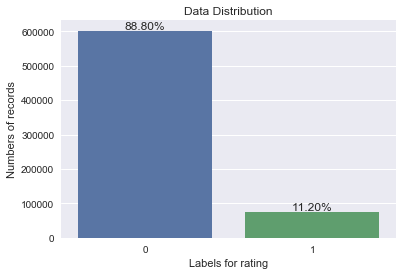

In [13]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(data['rating']).set_title('Data Distribution')
ax = plt.gca()
total_len = len(data['rating'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for rating")
ax.set_ylabel("Numbers of records")
plt.show()

There are two columns that describe a reason for the loan - title and purpose. As shown below title has many more categories which makes it less specific and helpful for the model, so it will be dropped.

In [15]:
pd.value_counts(data.title).to_frame()

,title
Debt consolidation,355393
Credit card refinancing,145252
Home improvement,34426
Other,27143
Major purchase,10240
Debt Consolidation,6484
Medical expenses,5597
Business,5503
Car financing,4720
Moving and relocation,3311


In [16]:
pd.value_counts(data.purpose).to_frame()

,purpose
debt_consolidation,402643
credit_card,163661
home_improvement,39026
other,31250
major_purchase,11786
small_business,6913
medical,6219
car,5614
moving,3780
vacation,3405


Application type variable shows whether the loan is individual or joint - number of joint loans will reflect huge number of NaN values in other variables dedicated for these loans.

In [17]:
pd.value_counts(data.application_type).to_frame()

,application_type
INDIVIDUAL,677158
JOINT,510


We Will change this variable to binary.

In [18]:
app_type={'INDIVIDUAL':0,'JOINT':1}
data.application_type.replace(app_type,inplace=True)

Term duration variable has two types - 36 months and 60 months. 

In [19]:
pd.value_counts(data.term).to_frame()

,term
36 months,451761
60 months,225907


We will change this term durations, '36 months' to 36 (numeric)

In [20]:
print("term before:-")
print(data.term.head())
data.term = pd.to_numeric(data.term.str[:3])
print("term after:-")
print(data.term.head())

term before:-
1     60 months
4     60 months
6     60 months
8     60 months
9     60 months
Name: term, dtype: object
term after:-
1    60
4    60
6    60
8    60
9    60
Name: term, dtype: int64


Grade and Subgrade variables are dedicated to credit rating of each individual. Will change them to numerical while making sure that the hierarchy is taken into account.

In [21]:
pd.value_counts(data.grade).to_frame()

,grade
C,192701
B,187720
D,109028
A,108433
E,57399
F,18166
G,4221


In [22]:
grade=data.grade.unique()
grade.sort()
grade

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

We use Enumerate function convert categorical to numeric
>Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.

In [23]:
for x,e in enumerate(grade):
    data.grade.replace(to_replace=e,value=x,inplace=True)

In [24]:
data.grade.unique()

array([2, 1, 5, 3, 0, 4, 6], dtype=int64)

In [25]:
pd.value_counts(data.sub_grade).to_frame()

,sub_grade
B4,40963
C1,40811
B3,40453
C2,40321
C3,39839
C4,39261
B5,36550
B2,35702
B1,34052
A5,33758


In [26]:
sub_grade=data.sub_grade.unique()
sub_grade.sort()
sub_grade

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [27]:
for x,e in enumerate(sub_grade):
    data.sub_grade.replace(to_replace=e,value=x,inplace=True)

data.sub_grade.unique()

array([13,  9, 14, 26, 10,  6,  8,  7, 11, 16,  4,  5, 23, 17, 28, 18, 19,
        1, 12,  2, 25, 15,  3, 24, 20, 21, 22, 32, 31, 30, 27, 29,  0, 33,
       34], dtype=int64)

Two variables describe title and length of employment. Title has 212 thousand categories so it will be dropped. Lenghth of employment should be sufficient to show whether an individual has a stable job.

In [28]:
pd.value_counts(data.emp_title).to_frame()

,emp_title
Teacher,11875
Manager,9680
Owner,5028
Registered Nurse,4836
RN,4657
Supervisor,4297
Sales,3674
Project Manager,3406
Driver,3175
Office Manager,3022


Converting categorical to numeric

In [29]:
print("emp_length before:-")
print(data.emp_length.head())
data.emp_length = data.emp_length.str.extract("(\d+)", expand=False).map(float)
print("emp_length after:-")
print(data.emp_length.head())

emp_length before:-
1    < 1 year
4    1 year  
6    8 years 
8    4 years 
9    < 1 year
Name: emp_length, dtype: object
emp_length after:-
1    1.0
4    1.0
6    8.0
8    4.0
9    1.0
Name: emp_length, dtype: float64


Home ownership variable should be informative for model as individuals who own their home should be much safer clients that ones that only rent it.

In [30]:
pd.value_counts(data.home_ownership).to_frame()

,home_ownership
MORTGAGE,337683
RENT,270560
OWN,69372
OTHER,41
NONE,10
ANY,2


Verification status variable indicated whether the source of income of a client was verified.

In [31]:
pd.value_counts(data.verification_status).to_frame()

,verification_status
Source Verified,269079
Verified,217016
Not Verified,191573


Payment plan variable will be dropped as it has only 8 'y' values.

In [32]:
pd.value_counts(data.pymnt_plan).to_frame()

,pymnt_plan
n,677660
y,8


Zip code will be dropped.

In [33]:
pd.value_counts(data.zip_code).to_frame()

,zip_code
750xx,7065
945xx,6976
112xx,6974
606xx,6505
300xx,6181
070xx,5618
331xx,5605
100xx,5403
770xx,5250
900xx,5213


In [34]:
data.addr_state.unique()

array(['GA', 'OR', 'NC', 'CA', 'TX', 'VA', 'FL', 'NY', 'PA', 'IL', 'OH',
       'WA', 'MN', 'CO', 'KS', 'AK', 'AZ', 'WI', 'NH', 'NJ', 'MO', 'MT',
       'WV', 'CT', 'NV', 'SC', 'WY', 'RI', 'LA', 'MA', 'KY', 'HI', 'MI',
       'AR', 'MD', 'AL', 'SD', 'DC', 'OK', 'VT', 'NM', 'UT', 'DE', 'MS',
       'TN', 'ID', 'NE', 'IA', 'IN', 'ME', 'ND'], dtype=object)

The state provided by the borrower in the loan application has 51 unique levels in data

Status of the loan values are – W, F and will be changed to binary.

In [35]:
print("Status of the loan values before:")
print(data.initial_list_status.head())
int_status={'w':0,'f':1}
data.initial_list_status.replace(int_status,inplace=True)
print("Status of the loan values after:")
print(data.initial_list_status.head())

Status of the loan values before:
1    f
4    f
6    f
8    f
9    f
Name: initial_list_status, dtype: object
Status of the loan values after:
1    1
4    1
6    1
8    1
9    1
Name: initial_list_status, dtype: int64


In [36]:
pd.value_counts(data.policy_code).to_frame()

,policy_code
1.0,677668


Policy code has only 1 value so will be dropped.

Recoveries variable informs about post charge off gross recovery. Will transform this to binary that will show whether this loan was recoveried. Will drop recovery fee as it is doubling similar information.

In [37]:
print("Status of the loan values before:")
print(data.recoveries.head())
data['recovery'] = np.where((data.recoveries != 0.00), 1, 0)
print("Status of the loan values after:")
print(data.recovery.head())

Status of the loan values before:
1    117.08
4    0.00  
6    0.00  
8    189.06
9    269.29
Name: recoveries, dtype: float64
Status of the loan values after:
1    1
4    0
6    0
8    1
9    1
Name: recovery, dtype: int32


Couple of variables are transformed to date time type.

In [38]:
data.issue_d=pd.to_datetime(data.issue_d)

earliest_cr_line=pd.to_datetime(data.earliest_cr_line)
data.earliest_cr_line=earliest_cr_line.dt.year

data.last_pymnt_d=pd.to_datetime(data.last_pymnt_d)

data.next_pymnt_d=pd.to_datetime(data.next_pymnt_d)

data.last_credit_pull_d=pd.to_datetime(data.last_credit_pull_d)

Dropping all variables mentioned above.

In [39]:
data.drop(['id','member_id','desc','loan_status','url', 'title','collection_recovery_fee','recoveries',
           'policy_code','zip_code','emp_title','pymnt_plan'],axis=1,inplace=True)

In [40]:
data.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,rating,recovery
1,2500.0,2500.0,2500.0,60,15.27,59.83,2,13,1.0,RENT,30000.0,Source Verified,2011-12-01,car,GA,1.00,0.0,1999.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,1,0.00,0.00,1008.71,1008.71,456.46,435.17,0.0,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,3000.0,3000.0,3000.0,60,12.69,67.79,1,9,1.0,RENT,80000.0,Source Verified,2011-12-01,other,OR,17.94,0.0,1996.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,1,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
6,7000.0,7000.0,7000.0,60,15.96,170.08,2,14,8.0,RENT,47004.0,Not Verified,2011-12-01,debt_consolidation,NC,23.51,0.0,2005.0,1.0,NaN,NaN,7.0,0.0,17726.0,85.6,11.0,1,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,2016-01-01,170.08,2016-02-01,2016-01-01,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
8,5600.0,5600.0,5600.0,60,21.28,152.39,5,26,4.0,OWN,40000.0,Source Verified,2011-12-01,small_business,CA,5.55,0.0,2004.0,2.0,NaN,NaN,11.0,0.0,5210.0,32.6,13.0,1,0.00,0.00,646.02,646.02,162.02,294.94,0.0,2012-04-01,152.39,NaT,2012-08-01,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
9,5375.0,5375.0,5350.0,60,12.69,121.45,1,9,1.0,RENT,15000.0,Verified,2011-12-01,other,TX,18.08,0.0,2004.0,0.0,NaN,NaN,2.0,0.0,9279.0,36.5,3.0,1,0.00,0.00,1476.19,1469.34,673.48,533.42,0.0,2012-11-01,121.45,NaT,2013-03-01,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
12,9000.0,9000.0,9000.0,36,13.49,305.38,2,10,1.0,RENT,30000.0,Source Verified,2011-12-01,debt_consolidation,VA,10.08,0.0,2004.0,1.0,NaN,NaN,4.0,0.0,10452.0,91.7,9.0,1,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,2012-07-01,305.38,NaT,2012-11-01,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
14,10000.0,10000.0,10000.0,36,10.65,325.74,1,6,3.0,RENT,100000.0,Source Verified,2011-12-01,other,CA,7.06,0.0,1991.0,2.0,NaN,NaN,14.0,0.0,11997.0,55.5,29.0,1,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,2013-10-01,325.74,NaT,2014-03-01,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
21,21000.0,21000.0,21000.0,36,12.42,701.73,1,8,10.0,RENT,105000.0,Verified,2011-12-01,debt_consolidation,FL,13.22,0.0,1983.0,0.0,NaN,NaN,7.0,0.0,32135.0,90.3,38.0,1,0.00,0.00,14025.40,14025.40,10694.96,3330.44,0.0,2013-09-01,701.73,NaT,2016-01-01,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
24,6000.0,6000.0,6000.0,36,11.71,198.46,1,7,1.0,RENT,76000.0,Not Verified,2011-12-01,major_purchase,CA,2.40,0.0,2001.0,1.0,NaN,NaN,7.0,0.0,5963.0,29.7,7.0,1,0.00,0.00,2050.14,2050.14,1305.58,475.25,0.0,2012-10-01,198.46,NaT,2013-03-01,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
26,15000.0,15000.0,8725.0,36,14.27,514.64,2,11,9.0,RENT,60000.0,Not Verified,2011-12-01,debt_consolidation,NY,15.22,0.0,2003

<a id='treat_missing_values'></a>

# 5. Missing Data Analysis

    Missing value analysis and dropping the records with missing values

In [41]:
data.isnull().sum().sum()

12769024

In [42]:
# we remove columns with more that 70% missing values
check_null = data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data))
print(check_null[check_null>0.7])

dti_joint                      0.999250
annual_inc_joint               0.999247
verification_status_joint      0.999247
il_util                        0.972714
mths_since_rcnt_il             0.969498
open_acc_6m                    0.968675
open_il_6m                     0.968675
open_il_12m                    0.968675
open_il_24m                    0.968675
total_bal_il                   0.968675
open_rv_12m                    0.968675
open_rv_24m                    0.968675
max_bal_bc                     0.968675
all_util                       0.968675
inq_fi                         0.968675
total_cu_tl                    0.968675
inq_last_12m                   0.968675
mths_since_last_record         0.836911
mths_since_last_major_derog    0.730086
dtype: float64


In [43]:
data.shape

(677668, 64)

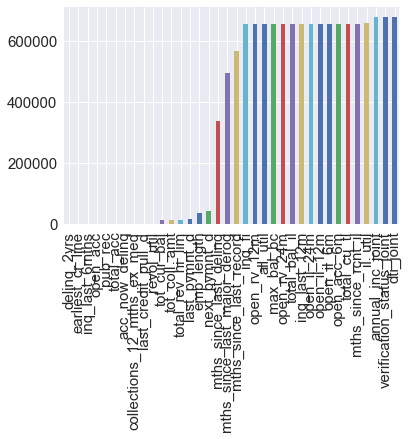

In [44]:
# first we'll visualize null count in overall dataframe
null_in_HousePrice = data.isnull().sum()
null_in_HousePrice = null_in_HousePrice[null_in_HousePrice > 0]
null_in_HousePrice.sort_values(inplace=True)
null_in_HousePrice.plot.bar()

In [45]:
# Printing total numbers and percentage of missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
dti_joint,677160,0.999250
annual_inc_joint,677158,0.999247
verification_status_joint,677158,0.999247
il_util,659177,0.972714
mths_since_rcnt_il,656998,0.969498
open_acc_6m,656440,0.968675
open_il_6m,656440,0.968675
open_il_12m,656440,0.968675
open_il_24m,656440,0.968675
total_bal_il,656440,0.968675


<a id='Missing_Data_Treatment'></a>
# 5.1. Missing Data Treatment

We will fill verification_status_joint using the value in verification_status as these are all individual applications and these values are not filled out.

In [46]:
data['verification_status_joint'].fillna(data['verification_status'], inplace=True)

For the categorical variables we are just going to replace NaN with 'Unknown'.

In [47]:
strColumns = data.select_dtypes(include=['object']).columns.values
data[strColumns] = data[strColumns].fillna('Unknown')

In [48]:
data.emp_length=data.emp_length.replace(np.nan,0)
data.emp_length.unique()

array([  1.,   8.,   4.,   3.,  10.,   9.,   2.,   7.,   6.,   5.,   0.])

Checking Null in categorical

In [49]:
data.select_dtypes(exclude=[np.number]).isnull().sum()

home_ownership               0    
verification_status          0    
issue_d                      0    
purpose                      0    
addr_state                   0    
last_pymnt_d                 17659
next_pymnt_d                 45248
last_credit_pull_d           36   
verification_status_joint    0    
dtype: int64

Will replace NaN with 0 and 'None' for status.

In [50]:
data.revol_util=data.revol_util.replace(np.nan,0)
data.dti_joint=data.dti_joint.replace(np.nan,0)
data.annual_inc_joint=data.annual_inc_joint.replace(np.nan,0)
data.verification_status_joint=data.verification_status_joint.replace(np.nan,'None')

In [51]:
data.drop(['last_pymnt_d','issue_d','last_credit_pull_d','next_pymnt_d','mths_since_last_delinq',
           'mths_since_last_major_derog','mths_since_last_record'],axis=1,inplace=True)

In [52]:
variables1=['open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
            'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
            'revol_util','dti_joint','annual_inc_joint','verification_status_joint','collections_12_mths_ex_med',
            'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim','acc_now_delinq', 'open_acc', 'total_acc','pub_rec',
            'delinq_2yrs','inq_last_6mths','earliest_cr_line']

for e in variables1:
    data[e]=data[e].replace(np.nan,0)

In [53]:
data.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
last_pym

## Standardization 
Data needs to be standardized before applying any model as the numerical values have different ranges for different variables.

In [54]:
X = data.drop(['rating'],axis=1,inplace=False)
y = data.rating

In [55]:
data_num = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
data_num

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'application_type', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'recovery'],
      dtype='object')

In [273]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X[data_num] = scaler.fit_transform(X[data_num])
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,recovery
1,-1.494608,-1.494530,-1.492084,1.414131,0.460170,-1.578013,0.122656,0.282623,-1.292193,RENT,-0.683244,Source Verified,car,GA,-0.928551,-0.374242,0.144396,4.583384,-1.611513,-0.341277,-0.678975,-1.969564,-1.796916,1.103029,-1.356000,-1.356001,-0.764285,-0.763924,-0.775548,-0.602142,-0.097547,-0.733340,-0.115772,-0.027444,-0.02476,-0.025503,Source Verified,-0.068012,-0.1121,-0.887578,-0.118609,-0.12266,-0.10818,-0.125659,-0.107049,-0.11518,-0.159221,-0.120199,-0.13373,-0.132845,-0.170558,-0.817419,-0.097143,-0.087407,-0.100916,5.144076
4,-1.435786,-1.435688,-1.433254,1.414131,-0.123573,-1.545348,-0.637278,-0.331601,-1.292193,RENT,0.070865,Source Verified,other,OR,-0.044239,-0.374242,-0.201956,-0.679328,0.599604,-0.341277,0.447634,-0.073554,1.072694,1.103029,-1.261492,-1.261455,-0.358170,-0.357129,-0.314057,-0.330915,-0.097547,-0.850012,-0.115772,-0.027444,-0.02476,-0.025503,Source Verified,-0.068012,-0.1121,-0.887578,-0.118609,-0.12266,-0.10818,-0.125659,-0.107049,-0.11518,-0.159221,-0.120199,-0.13373,-0.132845,-0.170558,-0.817419,-0.097143,-0.087407,-0.100916,-0.194398
6,-0.965208,-0.964953,-0.962612,1.414131,0.616287,-1.125590,0.122656,0.436178,0.587572,RENT,-0.426787,Not Verified,debt_consolidation,NC,0.246529,-0.374242,0.837100,0.373214,-0.874474,-0.341277,0.013456,1.277087,-1.206114,1.103029,-1.123194,-1.123100,0.531838,0.534369,0.433454,0.622287,-0.097547,-0.619929,-0.115772,-0.027444,-0.02476,-0.025503,Not Verified,-0.068012,-0.1121,-0.887578,-0.118609,-0.12266,-0.10818,-0.125659,-0.107049,-0.11518,-0.159221,-0.120199,-0.13373,-0.132845,-0.170558,-0.817419,-0.097143,-0.087407,-0.100916,-0.194398
8,-1.129910,-1.129710,-1.127337,1.414131,1.819974,-1.198183,2.402458,2.278849,-0.486580,OWN,-0.532422,Source Verified,small_business,CA,-0.691029,-0.374242,0.721649,1.425757,-0.137435,-0.341277,-0.526881,-0.981082,-1.037313,1.103029,-1.356000,-1.356001,-0.830234,-0.829983,-0.852031,-0.668415,-0.097547,-0.659720,-0.115772,-0.027444,-0.02476,-0.025503,Source Verified,-0.068012,-0.1121,-0.887578,-0.118609,-0.12266,-0.10818,-0.125659,-0.107049,-0.11518,-0.159221,-0.120199,-0.13373,-0.132845,-0.170558,-0.817419,-0.097143,-0.087407,-0.100916,5.144076
9,-1.156380,-1.156189,-1.156752,1.414131,-0.123573,-1.325149,-0.637278,-0.331601,-1.292193,RENT,-0.909477,Verified,other,TX,-0.036931,-0.374242,0.721649,-0.679328,-1.795772,-0.341277,-0.351215,-0.814915,-1.881316,1.103029,-1.356000,-1.356001,-0.679282,-0.680027,-0.719176,-0.555709,-0.097547,-0.729314,-0.115772,-0.027444,-0.02476,-0.025503,Verified,-0.068012,-0.1121,-0.887578,-0.118609,-0.12266,-0.10818,-0.125659,-0.107049,-0.11518,-0.159221,-0.120199,-0.13373,-0.132845,-0.170558,-0.817419,-0.097143,-0.087407,-0.100916,5.144076


Next step is to use get dummies function that will transform all non numerical values to model-friendly format.

In [56]:
X=pd.get_dummies(X,drop_first=True)
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,...,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,verification_status_joint_Source Verified,verification_status_joint_Verified
1,2500.0,2500.0,2500.0,60,15.27,59.83,2,13,1.0,30000.0,1.00,0.0,1999.0,5.0,3.0,0.0,1687.0,9.4,4.0,1,0.00,0.00,1008.71,1008.71,456.46,435.17,0.0,119.66,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,3000.0,3000.0,3000.0,60,12.69,67.79,1,9,1.0,80000.0,17.94,0.0,1996.0,0.0,15.0,0.0,27783.0,53.9,38.0,1,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,67.79,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,7000.0,7000.0,7000.0,60,15.96,170.08,2,14,8.0,47004.0,23.51,0.0,2005.0,1.0,7.0,0.0,17726.0,85.6,11.0,1,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,170.08,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5600.0,5600.0,5600.0,60,21.28,152.39,5,26,4.0,40000.0,5.55,0.0,2004.0,2.0,11.0,0.0,5210.0,32.6,13.0,1,0.00,0.00,646.02,646.02,162.02,294.94,0.0,152.39,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,5375.0,5375.0,5350.0,60,12.69,121.45,1,9,1.0,15000.0,18.08,0.0,2004.0,0.0,2.0,0.0,9279.0,36.5,3.0,1,0.00,0.00,1476.19,1469.34,673.48,533.42,0.0,121.45,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [57]:
X.shape

(677668, 123)

In [58]:
# Performing train test split on the data
from sklearn.cross_validation import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (474367, 123)
x_test  (203301, 123)
y_train  (474367,)
y_test  (203301,)


<a id='Random_Forest'></a>

# Random Forest 

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [117]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=2, oob_score = True)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [60]:
# Predictions and Evaluation
# Predicting the class of not.fully.paid for the X_test data.
test_pred = rfc.predict(x_test)
train_pred = rfc.predict(x_train)

In [61]:
print(train_pred[:5])
print(test_pred[:5])

[1 0 0 0 0]
[0 0 0 0 0]


In [63]:
train_pred_prob = rfc.predict_proba(x_train)
print (train_pred_prob)

[[ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]


predict_proba gives values for both success and failure. But we know that probability of failure= 1-probability of success. Thus it is sufficient for us to have only success probabilities. Hence we consider only success probabilities [:,1] is first column has success probabilities

# ROC Curve

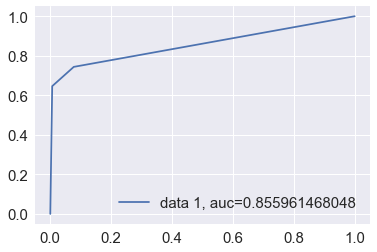

In [112]:
y_pred_proba = rfc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [101]:
from sklearn import metrics

cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)

tmp1 = pd.Series({'Model': " Base Random Forest ",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred),
                 'Precision Score': metrics.precision_score(y_test, test_pred),
                 'Recall Score': metrics.recall_score(y_test, test_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, test_pred)})

model_rt1_report = models_report.append(tmp1, ignore_index = True)
model_rt1_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Base Random Forest,0.819997,0.927878,0.646281,0.955067,0.737959


In [303]:
# set of parameters to test
param_grid = {'n_estimators': [2, 3],'max_features': ['auto', 'sqrt', 'log2']}

In [304]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [310]:
CV_rfc.fit(x_train, y_train)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 2}


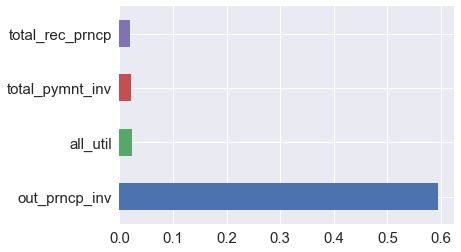

In [108]:
(pd.Series(rfc.feature_importances_, index=X.columns)
   .nlargest(4)
   .plot(kind='barh')) 

# Hyperparameter

Randomized search on hyper parameters.

RandomizedSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [73]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 5, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1, 2, 3, 4, 5], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}


In [75]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,n_iter = 10, cv = 3,random_state=42)
# Fit the random search model
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [1, 2, 3, 4, 5], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation. More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

We can view the best parameters from fitting the random search:

In [76]:
rf_random.best_params_

{'n_estimators': 2,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 6,
 'bootstrap': True}

In [93]:
print(rf_random.best_score_)
print(rf_random.best_estimator_)

0.956778190726
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)


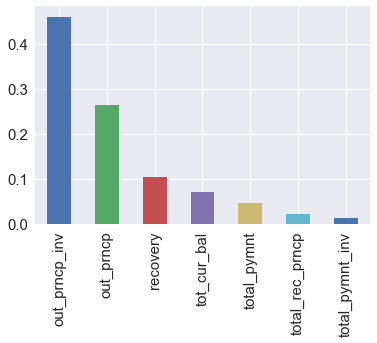

In [94]:
best_model = rf_random.best_estimator_
best_model.fit(x_train, y_train)

importance = sorted(zip(map(lambda x: round(x, 4), best_model.feature_importances_), X.columns),reverse=True)

y_val = []
x_val = [x[0] for x in importance]

for x in importance:
    y_val.append(x[1])
    
pd.Series(x_val,index=y_val)[:7].plot(kind='bar')
plt.show()

# Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [98]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(best_model, random_state=1)
bagging.fit(X,y)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

# ROC Curve

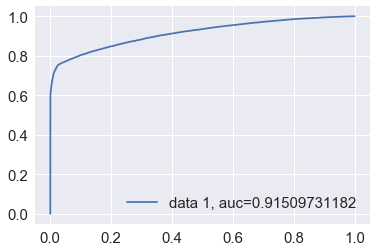

In [113]:
y_pred_proba = bagging.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [100]:
test_pred_bag = bagging.predict(x_test)

tmp2 = pd.Series({'Model': " Random Forest with BaggingClassifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred_bag),
                 'Precision Score': metrics.precision_score(y_test, test_pred_bag),
                 'Recall Score': metrics.recall_score(y_test, test_pred_bag),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred_bag),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, test_pred_bag)})

model_rt2_report = models_report.append(tmp2, ignore_index = True)
model_rt2_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Random Forest with BaggingClassifier,0.840182,0.914474,0.688423,0.95818,0.76285


# Gradient Boosting for Classification

GradientBoostingClassifier supports both binary and multi-class classification. 

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

In [103]:
# Classify using a Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=10, max_depth=1, learning_rate=1.0, random_state=42)
clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

# AUC Score

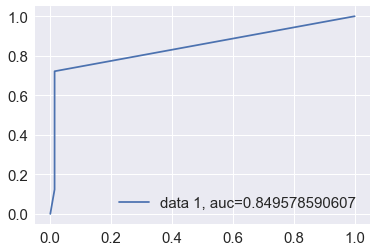

In [111]:
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [115]:
test_pred_gb = clf.predict(x_test)

tmp3 = pd.Series({'Model': " Gradient Boosting for Classification",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred_gb),
                 'Precision Score': metrics.precision_score(y_test, test_pred_gb),
                 'Recall Score': metrics.recall_score(y_test, test_pred_gb),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred_gb),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, test_pred_gb)})

model_rt3_report = models_report.append(tmp3, ignore_index = True)
model_rt3_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Gradient Boosting for Classification,0.853776,0.864414,0.721721,0.956454,0.76262


In [116]:
# Comparison of Random Forest based on criterion and max_features

cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
model_rf = pd.DataFrame(columns = cols)
model_rf = model_rf.append([model_rt1_report,model_rt2_report,model_rt3_report], ignore_index = True)
model_rf

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Base Random Forest,0.819997,0.927878,0.646281,0.955067,0.737959
1,Random Forest with RandomizedSearchCV,0.839143,0.903318,0.687494,0.957054,0.757446
2,Gradient Boosting for Classification,0.853776,0.864414,0.721721,0.956454,0.762620


As can be seen by the accuracy scores, our base model which contained all four features is 95.5% accurate while the our ‘Gradient Boosting for Classification’ model which has 95.6% accurate. Thus, for a small cost in accuracy we halved the number of features in the model and compared with Precision, Recall Score and ROC Score has higher compared to other models